In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle.

Don't forget to apply the most suitable missing-value-filling techniques you applied in the previous checkpoint to the data.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline 

import seaborn as sns

from scipy import stats

In [2]:
df = pd.read_csv('states_all.csv')

In [3]:
filled_df = df.interpolate(method ='linear', limit_direction ='both')

In [4]:
filled_df.isnull().sum()*100/filled_df.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

In [5]:
filled_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,727716.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,472847.0,208148.0,731634.0,208.0,252.0,207.0,255.0
1,1992_ALASKA,ALASKA,1992,727716.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,472847.0,208148.0,122487.0,211.5,258.5,208.0,255.0
2,1992_ARIZONA,ARIZONA,1992,727716.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,472847.0,208148.0,673477.0,215.0,265.0,209.0,255.0
3,1992_ARKANSAS,ARKANSAS,1992,727716.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,472847.0,208148.0,441490.0,210.0,256.0,211.0,255.0
4,1992_CALIFORNIA,CALIFORNIA,1992,727716.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,472847.0,208148.0,5254844.0,208.0,261.0,202.0,255.0


### Derive the descriptive statistics of the data and discuss the points you find remarkable.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

In [7]:
filled_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,...,1715.000000,1715.000000,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1715.000000,1715.000000,1715.000000,1715.000000
mean,2002.075219,7.007401e+05,7.291406e+06,6.023584e+05,3.441789e+06,3.247259e+06,7.366192e+06,3.781149e+06,2.144610e+06,3.276554e+05,...,66183.855394,65153.356851,55903.484548,4.291830e+05,2.613810e+05,8.742983e+05,232.919825,274.688047,218.510787,261.540525
std,9.568621,9.693010e+05,1.059689e+07,1.028205e+06,4.966475e+06,4.955804e+06,1.080380e+07,5.685971e+06,3.035901e+06,4.806993e+05,...,79112.025351,77174.468674,66726.316969,5.658085e+05,2.918137e+05,1.044932e+06,9.299444,8.688255,6.117771,5.952766
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,9.451100e+04,2.044669e+06,1.230120e+05,1.175899e+06,7.457580e+05,2.034229e+06,9.214940e+05,5.857000e+05,5.357000e+04,...,14956.000000,14656.500000,12923.500000,5.899800e+04,9.106357e+04,1.892720e+05,224.251397,269.000000,215.000000,255.000000
50%,2002.000000,4.507510e+05,2.906573e+06,2.538890e+05,1.546921e+06,1.125436e+06,2.930393e+06,1.534954e+06,8.716130e+05,1.541750e+05,...,46094.000000,44641.000000,38013.000000,3.069440e+05,2.081480e+05,5.970960e+05,235.000000,274.000000,219.192308,261.714286
75%,2010.000000,8.694485e+05,8.165744e+06,6.732800e+05,3.837822e+06,3.484108e+06,8.220253e+06,4.133618e+06,2.442635e+06,4.079995e+05,...,77052.000000,76719.500000,68023.000000,4.815905e+05,2.879430e+05,1.002840e+06,240.307692,281.000000,222.571429,266.153846
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


Average TOTAL_REVENUE and is around 7.2 and the standard deviation of it is nearly 1.05 meaning that TOTAL_REVENUE is hihgly volatile. The same we can say about TOTAL_EXPENDITURE.

In [8]:
filled_df.describe(include= 'all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715,1715,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,...,1715.000000,1715.000000,1715.000000,1.715000e+03,1.715000e+03,1.715000e+03,1715.000000,1715.000000,1715.000000,1715.000000
unique,1715,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1992_ALABAMA,ALABAMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.075219,7.007401e+05,7.291406e+06,6.023584e+05,3.441789e+06,3.247259e+06,7.366192e+06,3.781149e+06,...,66183.855394,65153.356851,55903.484548,4.291830e+05,2.613810e+05,8.742983e+05,232.919825,274.688047,218.510787,261.540525
std,NaN,NaN,9.568621,9.693010e+05,1.059689e+07,1.028205e+06,4.966475e+06,4.955804e+06,1.080380e+07,5.685971e+06,...,79112.025351,77174.468674,66726.316969,5.658085e+05,2.918137e+05,1.044932e+06,9.299444,8.688255,6.117771,5.952766
min,NaN,NaN,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,NaN,NaN,1994.000000,9.451100e+04,2.044669e+06,1.230120e+05,1.175899e+06,7.457580e+05,2.034229e+06,9.214940e+05,...,14956.000000,14656.500000,12923.500000,5.899800e+04,9.106357e+04,1.892720e+05,224.251397,269.000000,215.000000,255.000000
50%,NaN,NaN,2002.000000,4.507510e+05,2.906573e+06,2.538890e+05,1.546921e+06,1.125436e+06,2.930393e+06,1.534954e+06,...,46094.000000,44641.000000,38013.000000,3.069440e+05,2.081480e+05,5.970960e+05,235.000000,274.000000,219.192308,261.714286
75%,NaN,NaN,2010.000000,8.694485e+05,8.165744e+06,6.732800e+05,3.837822e+06,3.484108e+06,8.220253e+06,4.133618e+06,...,77052.000000,76719.500000,68023.000000,4.815905e+05,2.879430e+05,1.002840e+06,240.307692,281.000000,222.571429,266.153846


In [9]:
filled_df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [10]:
filled_df.STATE.value_counts()

ALABAMA                 33
ALASKA                  33
NEVADA                  33
NEW_HAMPSHIRE           33
NEW_JERSEY              33
NEW_MEXICO              33
NEW_YORK                33
NORTH_CAROLINA          33
NORTH_DAKOTA            33
OHIO                    33
OKLAHOMA                33
OREGON                  33
PENNSYLVANIA            33
RHODE_ISLAND            33
SOUTH_CAROLINA          33
SOUTH_DAKOTA            33
TENNESSEE               33
TEXAS                   33
UTAH                    33
VERMONT                 33
VIRGINIA                33
WASHINGTON              33
WEST_VIRGINIA           33
WISCONSIN               33
WYOMING                 33
NEBRASKA                33
MONTANA                 33
MISSOURI                33
MISSISSIPPI             33
ARIZONA                 33
ARKANSAS                33
CALIFORNIA              33
COLORADO                33
CONNECTICUT             33
DELAWARE                33
DISTRICT_OF_COLUMBIA    33
FLORIDA                 33
G

In [12]:
filled_df.YEAR.value_counts()

1992    53
2003    53
2017    53
1990    53
2015    53
2013    53
2011    53
2009    53
2007    53
2005    53
2019    53
2002    53
1996    53
1994    53
2000    53
1998    53
1991    51
1995    51
1989    51
1988    51
1987    51
1986    51
2016    51
2014    51
2004    51
1997    51
2012    51
2010    51
1999    51
1993    51
2006    51
2001    51
2008    51
Name: YEAR, dtype: int64

### Choose a state (such as California) and draw a line graph of its total revenues and total expenditures over the years. How do these two variables evolve during these years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

In [23]:
select_state = filled_df.loc[filled_df['STATE'] == 'CALIFORNIA']
select_state_sorted = select_state.sort_values(by='YEAR',ascending=True)
select_state_sorted 

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1303,1986_CALIFORNIA,CALIFORNIA,1986,94511.0,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,...,325902.0,304787.0,251281.0,58998.0,4.006944e+05,4377989.0,233.714286,270.400000,215.857143,260.428571
1304,1987_CALIFORNIA,CALIFORNIA,1987,94511.0,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,...,335078.0,311579.0,266028.0,58998.0,6.579019e+05,4488398.0,233.428571,266.800000,215.714286,260.857143
1305,1988_CALIFORNIA,CALIFORNIA,1988,94511.0,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,...,352076.0,318856.0,257450.0,58998.0,9.151093e+05,4618120.0,233.142857,263.200000,215.571429,261.285714
1306,1989_CALIFORNIA,CALIFORNIA,1989,94511.0,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,...,379538.0,330967.0,243023.0,58998.0,1.172317e+06,4771978.0,232.857143,259.600000,215.428571,261.714286
1307,1990_CALIFORNIA,CALIFORNIA,1990,94511.0,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,...,399293.0,347479.0,244142.0,58998.0,1.429524e+06,4950474.0,232.571429,256.000000,215.285714,262.142857
1308,1991_CALIFORNIA,CALIFORNIA,1991,94511.0,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,...,412613.0,355168.0,260693.0,58998.0,1.686732e+06,5107145.0,232.285714,266.500000,215.142857,262.571429
4,1992_CALIFORNIA,CALIFORNIA,1992,727716.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,472847.0,2.081480e+05,5254844.0,208.000000,261.000000,202.000000,255.000000
55,1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,...,420233.0,380223.0,277271.0,472847.0,2.081480e+05,5327231.0,224.888268,274.846369,221.557692,255.000000
106,1994_CALIFORNIA,CALIFORNIA,1994,4120498.0,23440845.0,2095878.0,13175550.0,8169417.0,23012688.0,12443864.0,...,426919.0,388561.0,285132.0,472847.0,2.081480e+05,5407475.0,223.748603,273.279330,197.000000,255.000000
157,1995_CALIFORNIA,CALIFORNIA,1995,5299405.0,29512214.0,2612241.0,15541486.0,11358487.0,30097549.0,16146416.0,...,428553.0,399039.0,287428.0,472847.0,2.081480e+05,5536406.0,222.608939,271.712291,220.675325,255.000000


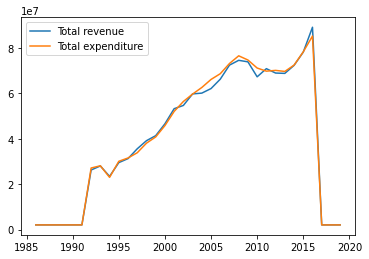

In [28]:
import matplotlib.pyplot as plt

# Define data values
Year = select_state_sorted['YEAR']
Total_revenue = select_state_sorted['TOTAL_REVENUE']
Total_Expenditure = select_state_sorted['TOTAL_EXPENDITURE']

# Plot a simple line chart
plt.plot(Year, Total_revenue, label='Total revenue')

# Plot another line on the same chart/graph
plt.plot(Year, Total_Expenditure, label = 'Total expenditure' )

plt.legend()
plt.show()

In [ ]:
#Peak in 2015 year

### In your chosen state, in which of the lessons are the students more successful—math or reading?

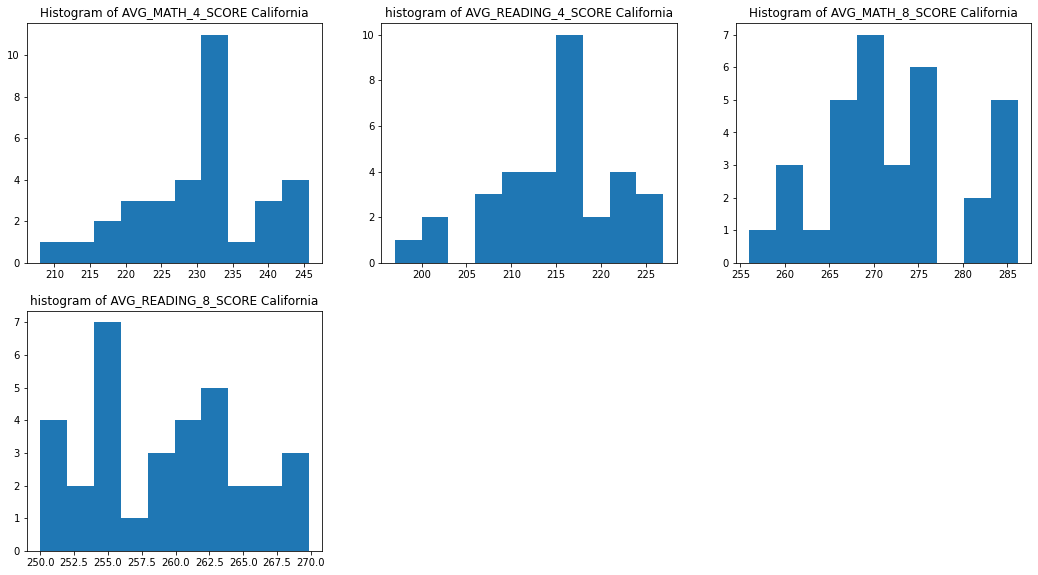

In [32]:
plt.figure(figsize=(18,15))
plt.subplot(3, 3, 1)
plt.hist(select_state_sorted["AVG_MATH_4_SCORE"]) 
plt.title("Histogram of AVG_MATH_4_SCORE California")

plt.subplot(3, 3, 3)
plt.hist(select_state_sorted["AVG_MATH_8_SCORE"])
plt.title("Histogram of AVG_MATH_8_SCORE California")

plt.subplot(3, 3, 2)
plt.hist(select_state_sorted["AVG_READING_4_SCORE"])
plt.title("histogram of AVG_READING_4_SCORE California")

plt.subplot(3, 3, 4)
plt.hist(select_state_sorted["AVG_READING_8_SCORE"])
plt.title("histogram of AVG_READING_8_SCORE California")


plt.show()

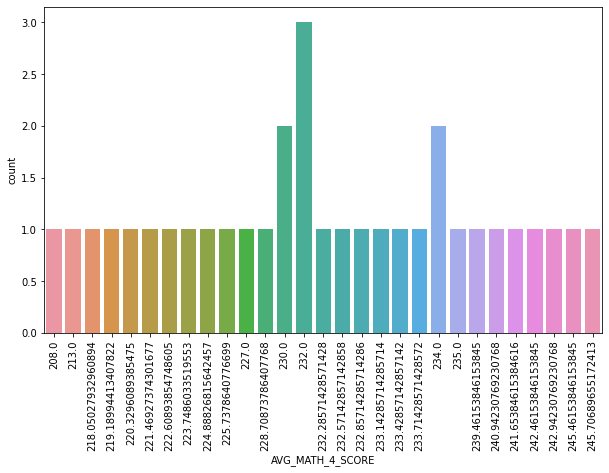

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x="AVG_MATH_4_SCORE", data=select_state_sorted)
plt.xticks(rotation=90)
plt.show()

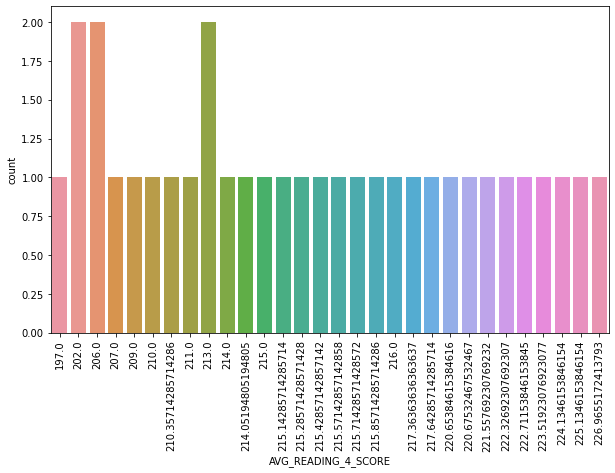

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x="AVG_READING_4_SCORE", data=select_state_sorted)
plt.xticks(rotation=90)
plt.show()

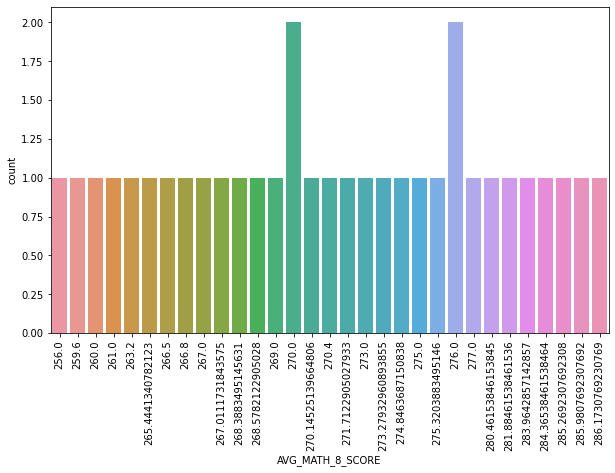

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x="AVG_MATH_8_SCORE", data=select_state_sorted)
plt.xticks(rotation=90)
plt.show()

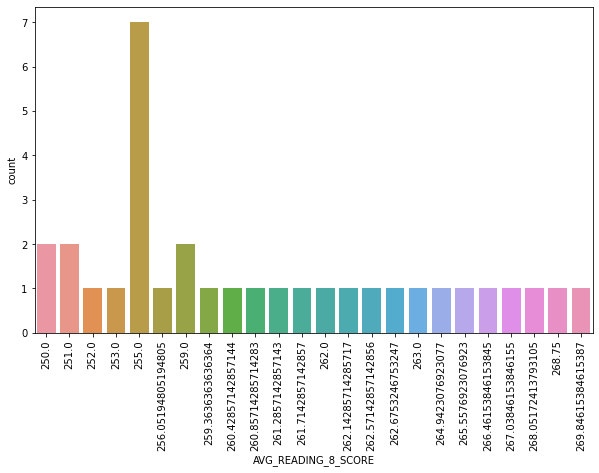

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x="AVG_READING_8_SCORE", data=select_state_sorted)
plt.xticks(rotation=90)
plt.show()

In [41]:
select_state_sorted['AVG_MATH_4_SCORE'].describe()

count     33.000000
mean     230.556409
std        9.040623
min      208.000000
25%      224.888268
50%      232.000000
75%      234.000000
max      245.706897
Name: AVG_MATH_4_SCORE, dtype: float64

In [42]:
select_state_sorted['AVG_READING_4_SCORE'].describe()

count     33.000000
mean     214.578633
std        7.133235
min      197.000000
25%      210.357143
50%      215.285714
75%      220.653846
max      226.965517
Name: AVG_READING_4_SCORE, dtype: float64

In [43]:
# Mean Math Score 4 is higher than Mean of Reading 4 score

In [44]:
select_state_sorted['AVG_MATH_8_SCORE'].describe()

count     33.000000
mean     272.100739
std        8.053304
min      256.000000
25%      267.000000
50%      270.400000
75%      276.000000
max      286.173077
Name: AVG_MATH_8_SCORE, dtype: float64

In [45]:
select_state_sorted['AVG_READING_8_SCORE'].describe()

count     33.000000
mean     259.173903
std        5.775186
min      250.000000
25%      255.000000
50%      259.363636
75%      262.675325
max      269.846154
Name: AVG_READING_8_SCORE, dtype: float64

In [46]:
# Mean Math Score 8 is higher than Mean of Reading 8 score

### What are the distributions of the math and reading scores in the sample?

Text(0, 0.5, 'Score scale')

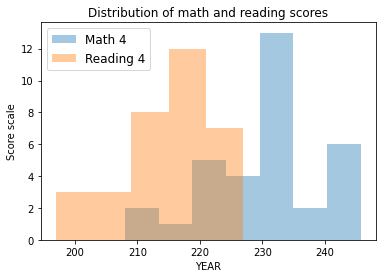

In [61]:
sns.distplot(select_state_sorted['AVG_MATH_4_SCORE'],  kde=False, label='Math 4')

sns.distplot(select_state_sorted['AVG_READING_4_SCORE'],  kde=False,label='Reading 4')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Distribution of math and reading scores')
plt.xlabel('YEAR') 
plt.ylabel('Score scale')

Text(0, 0.5, 'Score scale')

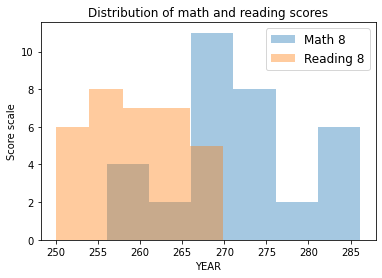

In [62]:
sns.distplot(select_state_sorted['AVG_MATH_8_SCORE'],  kde=False, label='Math 8')

sns.distplot(select_state_sorted['AVG_READING_8_SCORE'],  kde=False,label='Reading 8')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Distribution of math and reading scores')
plt.xlabel('YEAR') 
plt.ylabel('Score scale')

### Now, look again at the original dataset (before you filled in the missing values). Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then, compare the effects of these techniques on the distributions of the score variables.

In [4]:
import pandas as pd
df = pd.read_csv('states_all.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [6]:
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [7]:
df.isnull().sum()*100/df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          28.629738
TOTAL_REVENUE                   25.655977
FEDERAL_REVENUE                 25.655977
STATE_REVENUE                   25.655977
LOCAL_REVENUE                   25.655977
TOTAL_EXPENDITURE               25.655977
INSTRUCTION_EXPENDITURE         25.655977
SUPPORT_SERVICES_EXPENDITURE    25.655977
OTHER_EXPENDITURE               28.629738
CAPITAL_OUTLAY_EXPENDITURE      25.655977
GRADES_PK_G                     10.087464
GRADES_KG_G                      4.839650
GRADES_4_G                       4.839650
GRADES_8_G                       4.839650
GRADES_12_G                      4.839650
GRADES_1_8_G                    40.524781
GRADES_9_12_G                   37.551020
GRADES_ALL_G                     4.839650
AVG_MATH_4_SCORE                67.055394
AVG_MATH_8_SCORE                64.897959
AVG_READING_4_SCORE             62

In [8]:
df_mean = df.fillna(df.mean(), inplace=True)  #Fill out the missing values using mean

/var/folders/1f/1mxcq1qd4ndfstjm328g7whh0000gn/T/ipykernel_18400/3699033021.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean = df.fillna(df.mean(), inplace=True)  #Fill out the missing values using mean


In [9]:
#Data Frame has non-numeric values. That's why we have an error using mean technique.

In [10]:
df_median = df.fillna(df.median())

/var/folders/1f/1mxcq1qd4ndfstjm328g7whh0000gn/T/ipykernel_18400/3484784094.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_median = df.fillna(df.median())


In [11]:
#Data Frame has non-numeric values.

In [13]:
df_inter = df.interpolate(method ='linear', limit_direction ='forward')

In [14]:
df_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1715 non-null   float64
 4   TOTAL_REVENUE                 1715 non-null   float64
 5   FEDERAL_REVENUE               1715 non-null   float64
 6   STATE_REVENUE                 1715 non-null   float64
 7   LOCAL_REVENUE                 1715 non-null   float64
 8   TOTAL_EXPENDITURE             1715 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1715 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1715 non-null   float64
 11  OTHER_EXPENDITURE             1715 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1715 non-null   float64
 13  GRA

In [16]:
df_inter.isnull().sum()*100/df_inter.isnull().count()   #interpolation technique is most suitable

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

Then, compare the effects of these techniques on the distributions of the score variables.

Text(0, 0.5, 'Score scale')

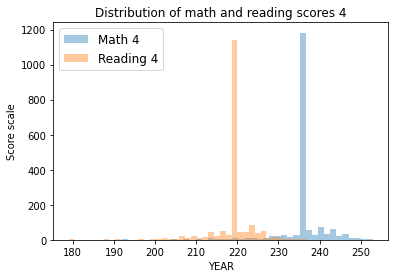

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df_inter['AVG_MATH_4_SCORE'],  kde=False, label='Math 4')

sns.distplot(df_inter['AVG_READING_4_SCORE'],  kde=False,label='Reading 4')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Distribution of math and reading scores 4')
plt.xlabel('YEAR') 
plt.ylabel('Score scale')

Text(0, 0.5, 'Score scale')

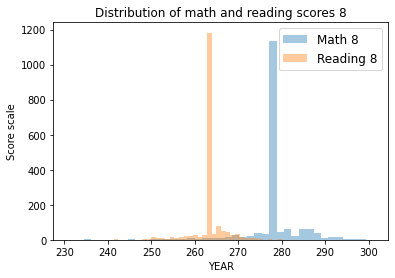

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df_inter['AVG_MATH_8_SCORE'],  kde=False, label='Math 8')

sns.distplot(df_inter['AVG_READING_8_SCORE'],  kde=False,label='Reading 8')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Distribution of math and reading scores 8')
plt.xlabel('YEAR') 
plt.ylabel('Score scale')